In [84]:
import torch
import torch.nn as nn
import numpy as np
from torchvision import datasets, transforms
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
device = 'cuda'


In [85]:
# Hyeprparameters
num_features = 16
num_epochs = 200
batch_size = 128
learning_rate = 0.00003
dropout_rate = 0.3




In [86]:
class CNN_VAE(nn.Module):
  def __init__(self):
    super(CNN_VAE, self).__init__()

    # encoder
    self.conv0 = nn.Conv2d(1, 32, kernel_size = 3, stride = 2, padding = 1)
    self.conv0_drop = nn.Dropout2d(dropout_rate)
    self.conv1 = nn.Conv2d(32, 64, kernel_size = 3, stride = 1, padding = 1)
    self.conv1_drop = nn.Dropout2d(dropout_rate)
    self.conv2 = nn.Conv2d(64, 128, kernel_size = 3, stride = 1, padding = 1)
    self.conv2_drop = nn.Dropout2d(dropout_rate)
    self.conv3 = nn.Conv2d(128, 256, kernel_size = 3, stride = 2, padding = 1)
    self.conv3_drop = nn.Dropout2d(dropout_rate)
    self.fc = nn.Linear(12544, num_features*2)

    # decoder

    self.fc1 = nn.Linear(16, 256*7*7)
    self.trans_conv1 = nn.ConvTranspose2d(256, 128, kernel_size = 3, stride = 2, padding = 1, output_padding = 1)
    self.trans_conv2 = nn.ConvTranspose2d(128, 64, kernel_size = 3, stride = 1, padding = 1)
    self.trans_conv3 = nn.ConvTranspose2d(64, 32, kernel_size = 3, stride = 1, padding = 1)
    self.trans_conv4 = nn.ConvTranspose2d(32, 1, kernel_size = 3, stride = 2, padding = 1, output_padding = 1)

  def reparameterize(self, mu, log_var):
    """
    :param mu: mean from the encoder's latent space
    :param log_var: log variance from the encoder's latent space
    """
    std = torch.exp(0.5*log_var) # standard deviation
    eps = torch.randn_like(std) # `randn_like` for inputsize
    sample = mu + (eps * std) # sampling from the input space
    return sample
 
  def forward(self, x):
    # encoding
    x = x.view(-1, 1, 28, 28)
    x = F.leaky_relu(self.conv0(x), 0.2)
    x = self.conv0_drop(x)
    x = F.leaky_relu(self.conv1(x), 0.2)
    x = self.conv1_drop(x)
    x = F.leaky_relu(self.conv2(x), 0.2)
    x = self.conv2_drop(x)
    x = F.leaky_relu(self.conv3(x), 0.2)
    x = self.conv3_drop(x)
    x = x.view(-1, 12544)
    x = self.fc(x)

    x = x.view(-1, 2, num_features)
    # get `mu` and `log_var`
    mu = x[:, 0, :] # the first feature values as mean
    log_var = x[:, 1, :] # the other feature values as variance
    # get the latent vector through reparameterization
    z = self.reparameterize(mu, log_var)

    # decoding
    x = self.fc1(z)
    x = x.view(-1, 256, 7, 7)
    x = F.relu(self.trans_conv1(x))
    x = F.relu(self.trans_conv2(x))
    x = F.relu(self.trans_conv3(x))
    x = self.trans_conv4(x)
    reconstruction = torch.sigmoid(x)
    return reconstruction, mu, log_var

  def generate(self, sample):
    x = self.fc1(sample)
    x = x.view(-1, 256, 7, 7)
    x = F.relu(self.trans_conv1(x))
    x = F.relu(self.trans_conv2(x))
    x = F.relu(self.trans_conv3(x))
    x = self.trans_conv4(x)
    generated = torch.sigmoid(x)
    return generated

model = CNN_VAE()
print(model)
model = model.to(device)
model.float()

CNN_VAE(
  (conv0): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv0_drop): Dropout2d(p=0.3, inplace=False)
  (conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv1_drop): Dropout2d(p=0.3, inplace=False)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_drop): Dropout2d(p=0.3, inplace=False)
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv3_drop): Dropout2d(p=0.3, inplace=False)
  (fc): Linear(in_features=12544, out_features=32, bias=True)
  (fc1): Linear(in_features=16, out_features=12544, bias=True)
  (trans_conv1): ConvTranspose2d(256, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
  (trans_conv2): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (trans_conv3): ConvTranspose2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (trans_conv4): ConvTranspose2d(32, 1, kernel_size=(3, 3), st

CNN_VAE(
  (conv0): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv0_drop): Dropout2d(p=0.3, inplace=False)
  (conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv1_drop): Dropout2d(p=0.3, inplace=False)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_drop): Dropout2d(p=0.3, inplace=False)
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv3_drop): Dropout2d(p=0.3, inplace=False)
  (fc): Linear(in_features=12544, out_features=32, bias=True)
  (fc1): Linear(in_features=16, out_features=12544, bias=True)
  (trans_conv1): ConvTranspose2d(256, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
  (trans_conv2): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (trans_conv3): ConvTranspose2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (trans_conv4): ConvTranspose2d(32, 1, kernel_size=(3, 3), st

In [87]:
# transforms
transform = transforms.Compose([
  transforms.ToTensor(),
])
# train and validation data
training_data = datasets.MNIST(
  root='../input/data',
  train=True,
  download=True,
  transform=transform
)
validation_data = datasets.MNIST(
  root='../input/data',
  train=False,
  download=True,
  transform=transform
)

# training and validation data loaders
train_loader = torch.utils.data.DataLoader(
  training_data,
  batch_size=batch_size,
  shuffle=True
)
val_loader = torch.utils.data.DataLoader(
  validation_data,
  batch_size=batch_size,
  shuffle=False
)

normal_samples = torch.randn(25, num_features).to(device)

In [88]:
def final_loss(bce_loss, mu, logvar):
  """
  This function will add the reconstruction loss (BCELoss) and the 
  KL-Divergence.
  KL-Divergence = 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
  :param bce_loss: recontruction loss
  :param mu: the mean from the latent vector
  :param logvar: log variance from the latent vector
  """
  BCE_loss = bce_loss 
  KL_Divergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
  return BCE_loss + KL_Divergence

In [89]:
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.BCELoss(reduction='sum')

def fit(model, dataloader):
  model.train()
  current_loss = 0.0
  for i, data in enumerate(dataloader):
    data, _ = data
    data = data.to(device)
    optimizer.zero_grad()
    reconstruction, mu, logvar = model(data)
    BCE_loss = criterion(reconstruction, data)
    loss = final_loss(BCE_loss, mu, logvar)
    current_loss += loss.item()
    loss.backward()
    optimizer.step()
  training_loss = current_loss/len(dataloader.dataset)
  return training_loss

In [90]:
def validate(model, dataloader, samples):
  model.eval()
  running_loss = 0.0
  with torch.no_grad():
    for i, data in enumerate(dataloader):
      data, _ = data
      data = data.to(device)
      reconstruction, mu, logvar = model(data)
      reconstruction = reconstruction.to(device)
      bce_loss = criterion(reconstruction, data)
      loss = final_loss(bce_loss, mu, logvar)
      running_loss += loss.item()

      # save the last batch input and output of every epoch
      if i == int(len(val_data)/dataloader.batch_size) - 1:
        num_rows = 8
        samples.append(torch.cat((data.view(BATCH_SIZE, 1, 28, 28)[:num_rows], 
                           reconstruction.view(BATCH_SIZE, 1, 28, 28)[:num_rows])))

  validation_loss = running_loss/len(dataloader.dataset)
  return validation_loss

In [91]:

def view_samples(samples, epoch):
  samples = samples.to('cpu')
  fig, axes = plt.subplots(figsize=(5,5), nrows=5, ncols=5, sharex=True, sharey=True)
  for ax, img in zip(axes.flatten(), samples):
        img = img.detach()
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(img.reshape((28,28)), cmap='Greys_r')


Epoch [    1/  200] | Training loss: 267.8777 | Validation loss: 200.3377
Epoch [    2/  200] | Training loss: 166.0368 | Validation loss: 140.4236
Epoch [    3/  200] | Training loss: 135.9213 | Validation loss: 124.3983
Epoch [    4/  200] | Training loss: 124.9961 | Validation loss: 117.9188
Epoch [    5/  200] | Training loss: 120.0298 | Validation loss: 114.3279
Epoch [    6/  200] | Training loss: 116.9941 | Validation loss: 112.2696
Epoch [    7/  200] | Training loss: 114.9765 | Validation loss: 110.5953
Epoch [    8/  200] | Training loss: 113.3658 | Validation loss: 109.3682
Epoch [    9/  200] | Training loss: 112.1184 | Validation loss: 108.2796
Epoch [   10/  200] | Training loss: 111.1387 | Validation loss: 107.6516
Epoch [   11/  200] | Training loss: 110.3052 | Validation loss: 107.0586
Epoch [   12/  200] | Training loss: 109.5302 | Validation loss: 106.3129
Epoch [   13/  200] | Training loss: 108.8943 | Validation loss: 105.8507
Epoch [   14/  200] | Training loss: 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


Epoch [  102/  200] | Training loss: 98.3518 | Validation loss: 97.6731
Epoch [  103/  200] | Training loss: 98.3047 | Validation loss: 97.6621
Epoch [  104/  200] | Training loss: 98.2589 | Validation loss: 97.6800
Epoch [  105/  200] | Training loss: 98.2236 | Validation loss: 97.4606
Epoch [  106/  200] | Training loss: 98.1631 | Validation loss: 97.5041
Epoch [  107/  200] | Training loss: 98.1819 | Validation loss: 97.5189
Epoch [  108/  200] | Training loss: 98.1231 | Validation loss: 97.5635
Epoch [  109/  200] | Training loss: 98.1012 | Validation loss: 97.5047
Epoch [  110/  200] | Training loss: 98.0703 | Validation loss: 97.5179
Epoch [  111/  200] | Training loss: 98.0591 | Validation loss: 97.4677
Epoch [  112/  200] | Training loss: 98.0240 | Validation loss: 97.4358
Epoch [  113/  200] | Training loss: 97.9798 | Validation loss: 97.4677
Epoch [  114/  200] | Training loss: 97.9667 | Validation loss: 97.4588
Epoch [  115/  200] | Training loss: 97.9141 | Validation loss: 

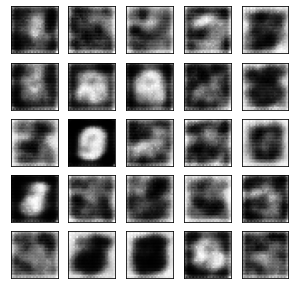

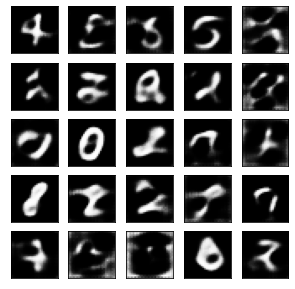

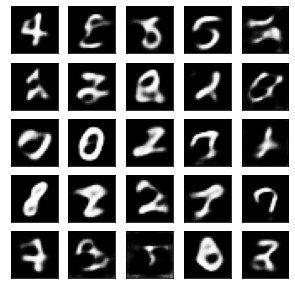

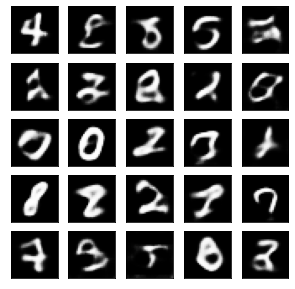

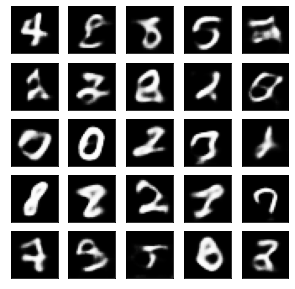

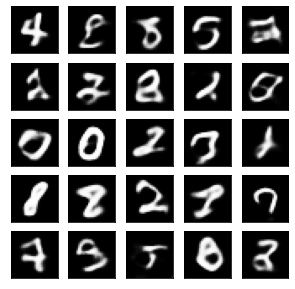

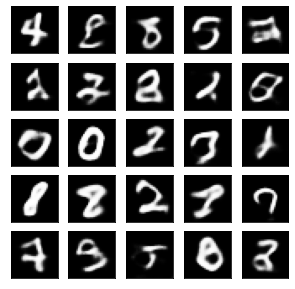

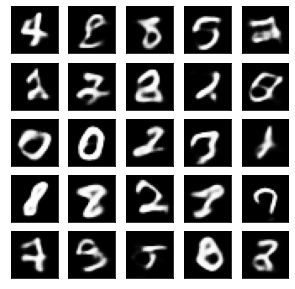

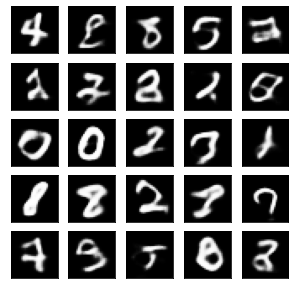

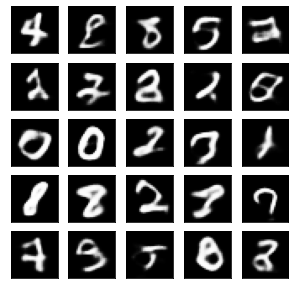

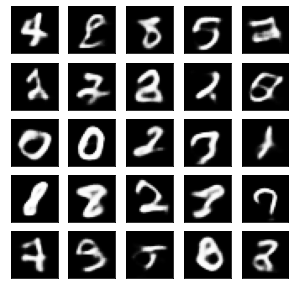

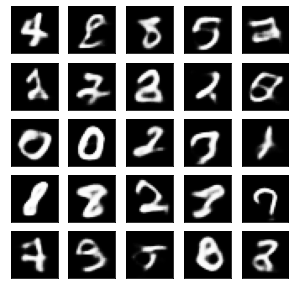

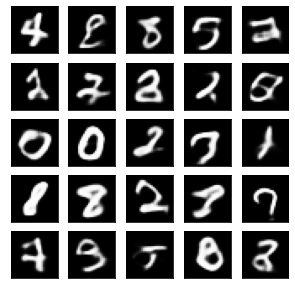

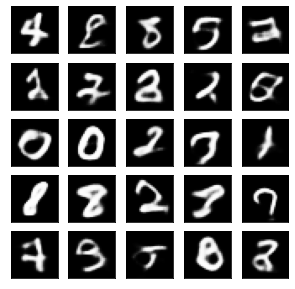

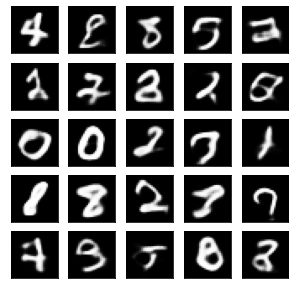

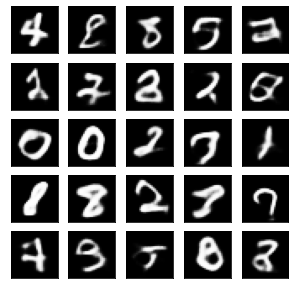

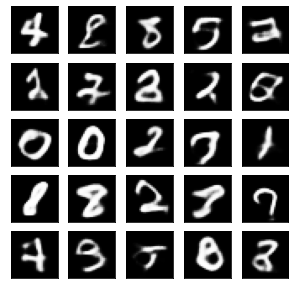

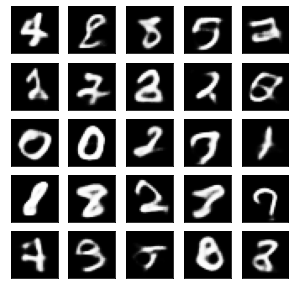

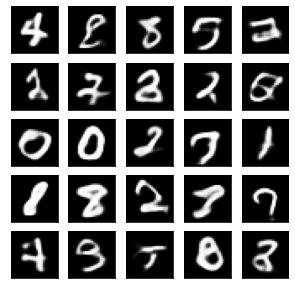

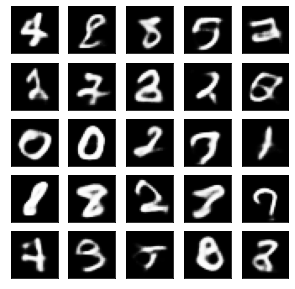

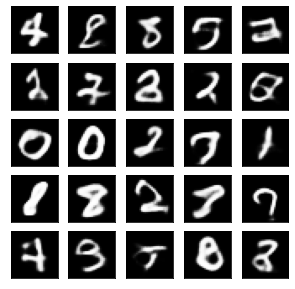

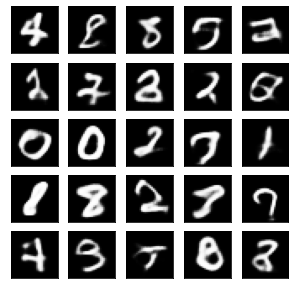

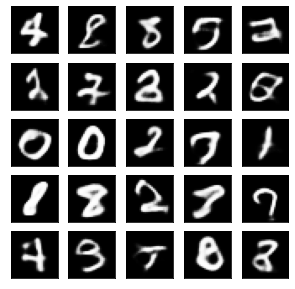

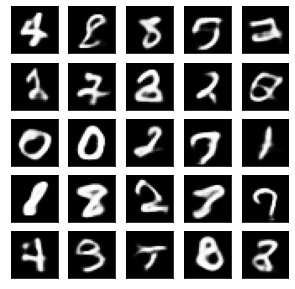

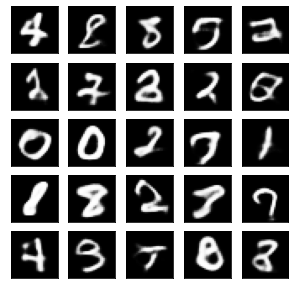

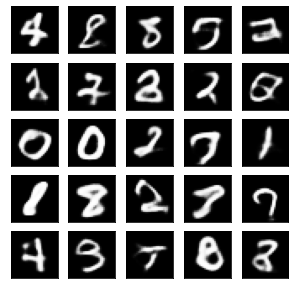

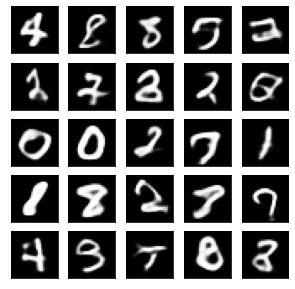

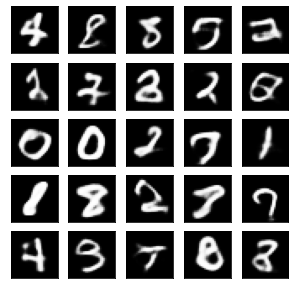

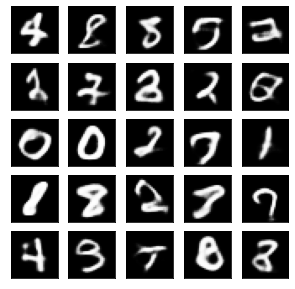

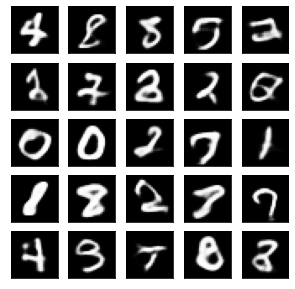

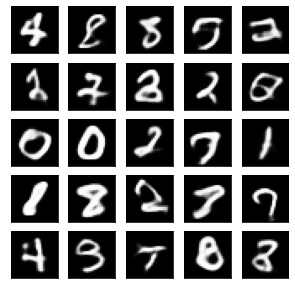

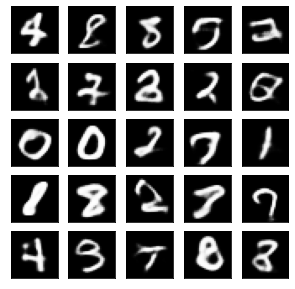

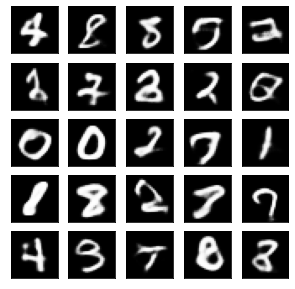

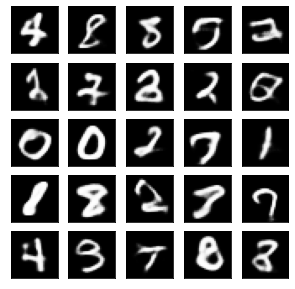

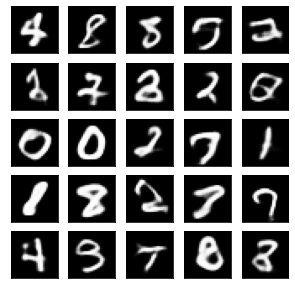

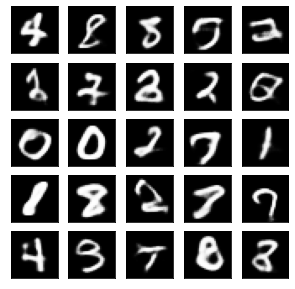

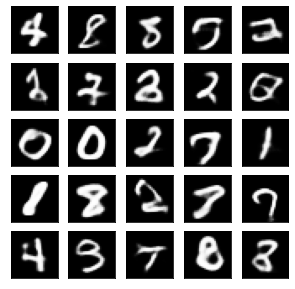

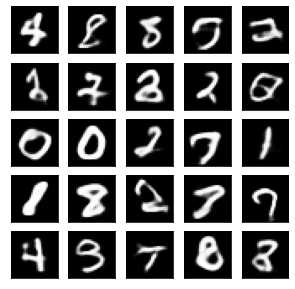

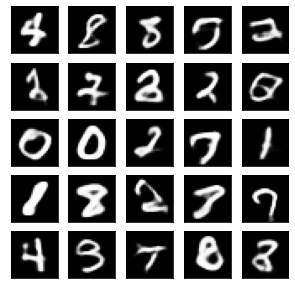

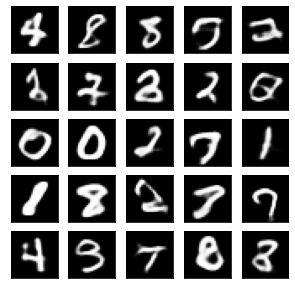

In [92]:
train_loss = []
val_loss = []
samples = []

for epoch in range(num_epochs):
    train_epoch_loss = fit(model, train_loader)
    val_epoch_loss = validate(model, val_loader, samples)
    train_loss.append(train_epoch_loss)
    val_loss.append(val_epoch_loss)
    print('Epoch [{:5d}/{:5d}] | Training loss: {:6.4f} | Validation loss: {:6.4f}'.format(
                    epoch+1, num_epochs, train_epoch_loss, val_epoch_loss))
    if epoch % 5 == 0:
      model.eval()
      generated_images = model.generate(normal_samples)
      generated_images = generated_images.view(25, 1, 28, 28)
      view_samples(generated_images, epoch+1)

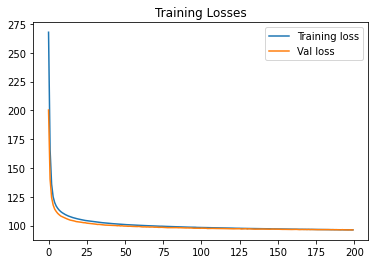

In [93]:
fig, ax = plt.subplots()
plt.plot(train_loss, label='Training loss')
plt.plot(val_loss, label='Val loss')
plt.title("Training Losses")
plt.legend()